In [1]:
import numpy as np
import IPython

from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

In [11]:
Fs, s = wavfile.read('data/violin1.wav')
s = s / 32767.0
print('sampling rate: {}Hz'.format(Fs))
IPython.display.Audio(s, rate=Fs)

sampling rate: 11025Hz


In [4]:
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)  # positive frequencies only
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    plt.xlabel(r'$\gamma$')
    plt.ylabel(r'$\hat{x}(\gamma)$')
    return N, X

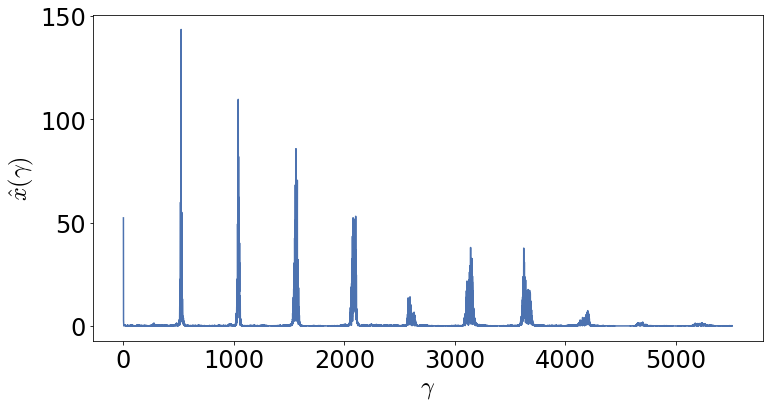

In [12]:
plot_spec(s, Fs, Fs/2);